In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, r2_score
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [17]:
# training data
X = np.array([[30, 80], [40, 90], [50, 100], [60, 110], [70, 120]])
y = np.array([0, 0, 1, 1, 1])

In [18]:
# create the model
model = LogisticRegression()

# fit the model to the training data
model.fit(X, y)

# predict the probability of the patient having the disease
probability = model.predict_proba([[35, 85]])[0][1]
print(f'Probability: {probability:.2f}')

Probability: 0.00


In [19]:
# predict the class labels
y_pred = model.predict(X)

# calculate the confusion matrix
cm = confusion_matrix(y, y_pred)

# create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# print the confusion matrix
print('Confusion Matrix:')
print(cm_df)

Confusion Matrix:
               Predicted Negative  Predicted Positive
True Negative                   2                   0
True Positive                   0                   3


In [20]:
# check the classification report
cr = classification_report(y, y_pred)
print('Classification Report:')
print(cr)



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [21]:
# calculate the R-squared value
r2 = r2_score(y, y_pred)
print(f'R-Squared Value: {r2:.2f}')

R-Squared Value: 1.00


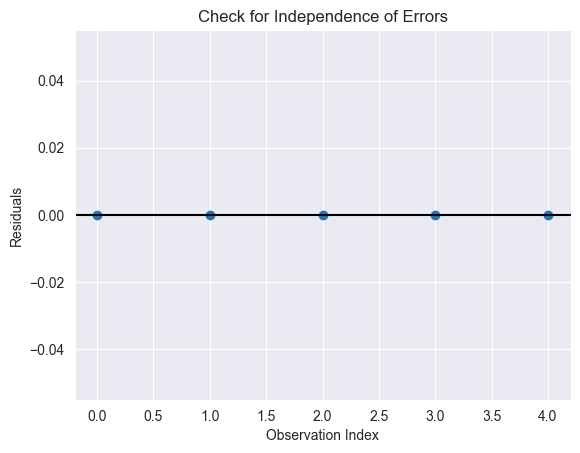

In [22]:
# check the assumption of independence of errors
residuals = y - y_pred
plt.plot(residuals, 'o')
plt.axhline(y=0, color='black', ls='-')
plt.xlabel('Observation Index')
plt.ylabel('Residuals')
plt.title('Check for Independence of Errors')
plt.show()

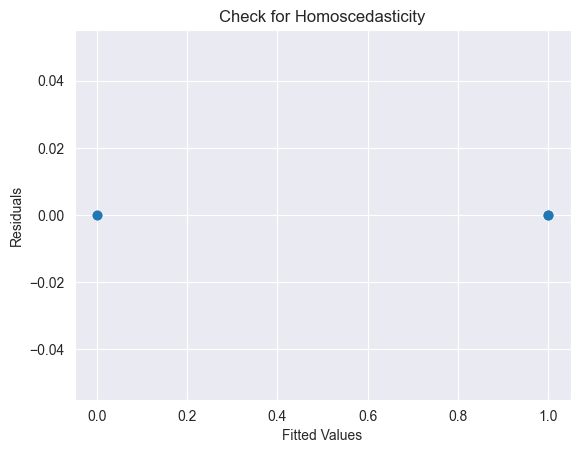

In [23]:
# check the assumption of homoscedasticity
plt.plot(y_pred, residuals, 'o')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Check for Homoscedasticity')
plt.show()

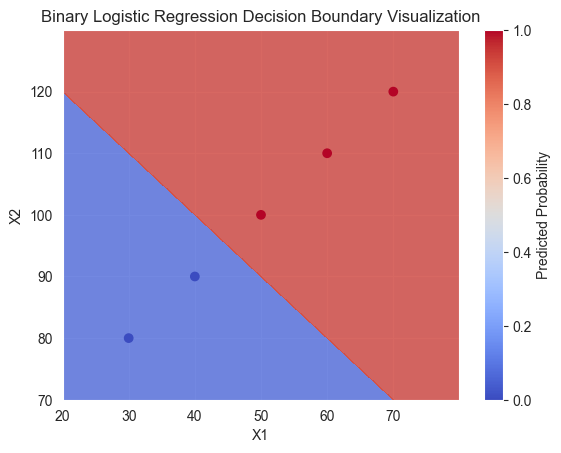

In [24]:
# Create a mesh to plot in
h = 0.02
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

# Add the color legend
cbar = plt.colorbar()
cbar.set_label('Predicted Probability')

# Add the labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Binary Logistic Regression Decision Boundary Visualization')
plt.show()

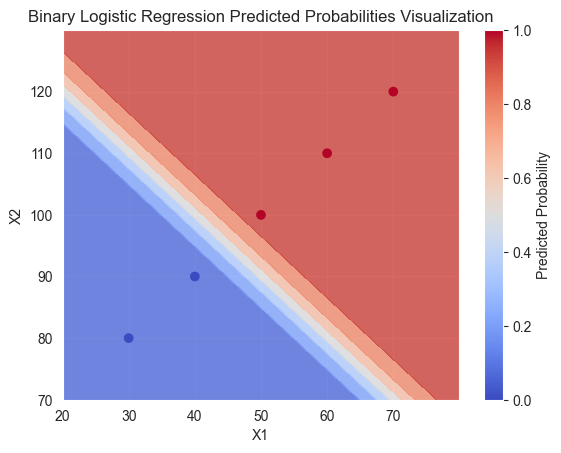

In [25]:
# Create a mesh to plot in
h = 0.02
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the predicted probabilities
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

# Add the color legend
cbar = plt.colorbar()
cbar.set_label('Predicted Probability')

# Add the labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Binary Logistic Regression Predicted Probabilities Visualization')
plt.show()


In [26]:
df = pd.read_csv('../data/cartabandonment.csv').set_index('user_id', drop=True)
df[['web2_repeat_visit', 'web1_session', 'cart3_items', 'cart4_checkout']] = df[['web2_repeat_visit', 'web1_session', 'cart3_items', 'cart4_checkout']].astype(int)
df['cart1_value'] = [float(x[1:].replace(',', '')) for x in df['cart1_value']]
df.head(100)

,web1_session,web2_repeat_visit,cart1_value,cart2_discount,cart3_items,cart4_checkout
user_id,,,,,,
A819610,904,1,25.0,0.25,4,1
A356631,180,0,113.0,NaN,6,0
A981711,120,1,239.0,NaN,3,0
A219958,147,0,171.0,NaN,5,0
A216559,173,1,147.0,,7,0
...,...,...,...,...,...,...
A278435,43,0,164.0,NaN,3,0
A212463,57,1,239.0,NaN,7,0
A604000,224,0,92.0,0.25,12,1


In [27]:
X = df[['web1_session', 'cart1_value', 'cart3_items', 'web2_repeat_visit']]
y = df.cart4_checkout

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)



model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [36]:
# features = ['web1_session', 'cart1_value', 'cart3_items', 'web2_repeat_visit']

def get_r2(x, y):

    # create the model
    model = LogisticRegression()

    print("#"*150)
    print(f"Using features: {x.columns.values}")
    print("="*150)

    # fit the model to the training data
    model.fit(x, y)

    # predict the class labels
    y_pred = model.predict(x)

    # calculate the confusion matrix
    cm = confusion_matrix(y, y_pred)

    # create a DataFrame from the confusion matrix
    cm_df = pd.DataFrame(cm, index=['True Negative', 'True Positive'], columns=['Predicted Negative', 'Predicted Positive'])
    cr = classification_report(y, y_pred)

    print('Classification Report:')
    print(cr)
    print("-"*150)

    # print the confusion matrix
    print('Confusion Matrix:')
    print(cm_df)
    print("-"*150)
    # calculate the R-squared value
    r2 = r2_score(y, y_pred)
    print(f'R-Squared Value: {r2:.2f}')
    print("")

    return r2

m1 = get_r2(X[['web1_session', 'cart1_value']], y)
m2 = get_r2(X[['web1_session', 'cart3_items']], y)
m3 = get_r2(X[['web1_session', 'web2_repeat_visit']], y)
m4 = get_r2(X[['cart1_value', 'cart3_items']], y)
m5 = get_r2(X[['cart1_value', 'web2_repeat_visit']], y)
m6 = get_r2(X[['cart3_items', 'web2_repeat_visit']], y)

######################################################################################################################################################
Using features: ['web1_session' 'cart1_value']
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       498
           1       0.97      0.94      0.95       501

    accuracy                           0.95       999
   macro avg       0.95      0.95      0.95       999
weighted avg       0.95      0.95      0.95       999

------------------------------------------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
               Predicted Negative  Predicted Positive
True Negative                 481                  17
True Positive                  32                 469
-------------------------------------------------------------------------------------------------------------------------